<img src="marketing.jpg"/>

In [451]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns 
import plotly.express as px
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [386]:
df=pd.read_csv('Advertising_Data.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [387]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [388]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [389]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [390]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [391]:
fig=px.scatter(df,x='TV',y='Sales')
fig.show()

In [392]:
fig1=px.scatter(df,x='Radio',y='Sales')
fig1.show()

In [393]:
fig2=px.scatter(df,x='Newspaper',y='Sales')
fig2.show()

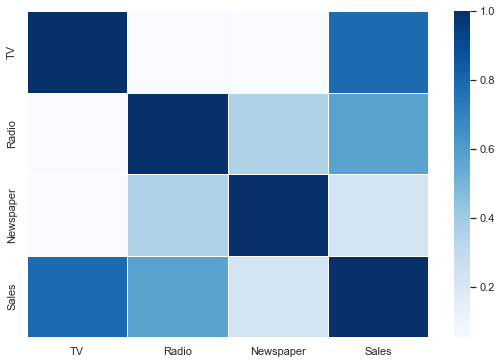

In [394]:
sns.set()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), linewidths=.5, ax=ax, cmap='Blues')
plt.show()

In [395]:
lm3=smf.ols(formula='Sales ~ TV+Radio+Newspaper',data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        21:57:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [396]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [397]:
x=df[['TV','Radio']]

In [398]:
scaler=StandardScaler()
scaler

StandardScaler()

In [399]:
arr=scaler.fit_transform(x)
arr

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

In [400]:
df1.describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,1.104672e-16,-4.413137e-16
std,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00
25%,-8.485295e-01,-8.973206e-01
50%,3.161515e-02,-2.457858e-02
75%,8.381955e-01,8.954299e-01
max,1.744029e+00,1.778300e+00


In [401]:
arr.shape

(200, 2)

In [402]:
arr.shape[1]

2

In [403]:
[variance_inflation_factor(arr,i)for i in range(arr.shape[1])]

[1.0030130408441913, 1.0030130408441913]

In [404]:
x.columns

Index(['TV', 'Radio'], dtype='object')

In [405]:
vif_df=pd.DataFrame()

In [406]:
vif_df['vif']=[variance_inflation_factor(arr,i)for i in range(arr.shape[1])]

In [407]:
vif_df

,vif
0,1.003013
1,1.003013


In [408]:
vif_df['feature']=x.columns

In [409]:
vif_df

,vif,feature
0,1.003013,TV
1,1.003013,Radio


In [410]:
arr

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

In [411]:
train_test_split(arr,y,test_size=0.25)

[array([[ 1.18353913,  0.46834341],
        [-0.51778195,  0.42782928],
        [-0.80386545,  1.58923451],
        [ 1.55486384, -0.88888015],
        [-0.82488383,  0.23201095],
        [ 1.12281936,  1.73778635],
        [-0.14879261, -1.24000266],
        [-1.09228433, -1.43582099],
        [ 1.64127273,  1.33264499],
        [-0.82605152,  0.2860298 ],
        [-1.27094056, -1.32103093],
        [ 1.06443498,  0.74519001],
        [ 0.61604287, -1.36154507],
        [-0.98952781, -0.72007125],
        [-0.68592899,  0.15098268],
        [-0.84006377,  0.7924565 ],
        [-0.83539302, -0.84161366],
        [ 1.10530405,  0.99502718],
        [-0.8377284 , -0.20013983],
        [-0.06705447,  0.23876331],
        [ 0.66625345,  0.65065703],
        [ 0.27040729, -1.04418434],
        [ 0.89862331, -1.40881156],
        [-1.51615499, -1.29402151],
        [-1.34917564,  0.09021148],
        [-0.54463877, -0.92264193],
        [-0.93581417, -0.78084245],
        [-0.91129272, -0.942

In [412]:
x_train,x_test,y_train,y_test=train_test_split(arr,y,test_size=0.25)

In [413]:
x_train

array([[-0.13828342,  1.24486436],
       [-1.63175608,  0.32654394],
       [-0.8377284 , -0.20013983],
       [-1.27327593,  1.15033137],
       [ 1.33417085,  1.31238792],
       [ 0.53897548, -0.3284346 ],
       [ 1.60273904, -0.85511837],
       [-0.91829885,  1.43393033],
       [ 0.80987904,  1.24486436],
       [ 0.79820216,  0.02268792],
       [-0.54463877, -0.92264193],
       [-0.42436693,  1.17058844],
       [ 0.34981006, -0.942899  ],
       [ 1.26527727,  0.24551567],
       [ 1.12281936,  1.73778635],
       [ 0.89862331, -1.40881156],
       [ 0.74332084,  0.42107692],
       [ 0.47708803, -0.40946287],
       [ 0.24938891, -1.09145083],
       [ 0.48292647, -0.34869167],
       [-0.18615862,  1.31914027],
       [-0.83539302, -0.84161366],
       [-1.34917564,  0.09021148],
       [-0.71628887,  0.84647535],
       [-0.90895735, -0.18663512],
       [ 0.59035374,  0.00243085],
       [ 0.4420574 , -0.15287334],
       [-1.02105537, -0.76058538],
       [-0.84473452,

In [414]:
lr=LinearRegression()

In [415]:
lr.fit(x_train,y_train)

LinearRegression()

In [416]:
lr.coef_

array([4.02095211, 2.68620622])

In [417]:
lr.intercept_

14.041055726047148

In [418]:
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [419]:
scaler.transform([[230.1,37.8]])

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[0.96985227, 0.98152247]])

In [420]:
lr.predict([[0.96985227, 0.98152247]])

array([20.57735703])

In [421]:
scaler.transform([[232.1,8.6]])

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[ 0.99320602, -0.99016549]])

In [422]:
lr.predict([[0.99320602, -0.99016549]])

array([15.37490087])

In [423]:
lr.score(x_test,y_test)

0.9113454944224196

In [424]:
def adj_r2(x,y):
    r2=lr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [425]:
adj_r2(x_test,y_test)

0.9075729622701821

In [426]:
lassocv=LassoCV(alphas=None,cv=10,max_iter=2000000,normalize=True)

In [427]:
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=2000000, normalize=True)

In [428]:
lassocv.alpha_

0.0003262710243285831

In [429]:
lasso=Lasso(alpha=lassocv.alpha_)

In [430]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0003262710243285831)

In [431]:
lasso.score(x_test,y_test)

0.911346335366873

In [432]:
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)

In [433]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([7.05167422, 7.4631271 , 4.25202926, 6.94024064, 9.85949674,
       7.24666994, 6.82095397, 9.61808176, 5.07117242, 0.39812828,
       5.31375821, 2.46458351, 8.32332949, 1.59568493, 6.03062512,
       4.11654053, 6.00709909, 9.44144146, 7.20718473, 1.94651744,
       4.79154766, 4.43160568, 4.23837441, 8.87544689, 4.19314819,
       6.02188343, 5.60312805, 1.69410598, 4.38157317, 2.83528305,
       7.87760993, 4.38865917, 4.09343552, 8.69994821, 0.07725864,
       3.02166914, 5.80664649, 8.64898366, 8.88450478, 6.70144278,
       3.51937266, 7.47635996, 6.79233265, 9.81911447, 3.10334606,
       2.78646918, 9.17572433, 6.8325493 , 7.12741644, 3.91520491]),
        cv=10, normalize=True)

In [434]:
ridgecv.alpha_

0.07725863937405819

In [435]:
ridge_lr=Ridge(alpha=ridgecv.alpha_)

In [436]:
ridge_lr.fit(x_train,y_train)

Ridge(alpha=0.07725863937405819)

In [437]:
ridge_lr.score(x_test,y_test)

0.9113681795006169

In [438]:
elastic=ElasticNetCV(alphas=None,cv=10)
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [439]:
elastic.alpha_

0.007762357076497877

In [440]:
elastic.l1_ratio_

0.5

In [441]:
elastic_lr=ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio_)
elastic_lr

ElasticNet(alpha=0.007762357076497877)

In [442]:
elastic_lr.fit(x_train,y_train)

ElasticNet(alpha=0.007762357076497877)

In [443]:
elastic_lr.score(x_test,y_test)

0.9115036192697948

In [444]:
scaler.transform([[10000,50000]])

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[ 115.05177934, 3374.60714543]])

In [445]:
elastic_lr.predict([[ 115.05177934, 3374.60714543]])

array([9492.81922428])